In [1]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
#might need to run this command in anaconda prompt "conda install -c conda-forge pydotplus"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

E:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Studying Dataset and Performing Data Wrangling on it

In [2]:
# Loading Dataset
missing=["na","--",".",".."]
td= pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/Titanic Dataset.csv",na_values=missing)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
td.isnull().sum() # Checking for nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
agemed=td["Age"].median() # Claculating Median so to fill it in the nulls

In [5]:
cnt=0
for row in td['Age']:
    try:
        int(row)==row
        pass
    except ValueError:
        td.loc[cnt,'Age']=agemed # filling median
    cnt+=1

In [6]:
td.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
pd.DataFrame.drop(td,axis=1,columns=["Name","Ticket","Cabin","PassengerId"],inplace=True)  #Droping all the irrelevant Columns

In [8]:
td["Age"]=td["Age"].astype("int64") # Changing Datatype

In [9]:
td.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Discretization of Age Column
td["Age"]=np.where((td["Age"]<20),"Teenagers",
                   np.where((td["Age"]>=20) & (td["Age"]<=30),"Adults",
                   np.where((td["Age"]>30) & (td["Age"]<=40),"Middle Aged",
                            "Old")))

In [11]:
td["Age"]=pd.Categorical(td.Age,['Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [12]:
td["Age"].value_counts() 

Adults         424
Teenagers      164
Middle Aged    155
Old            148
Name: Age, dtype: int64

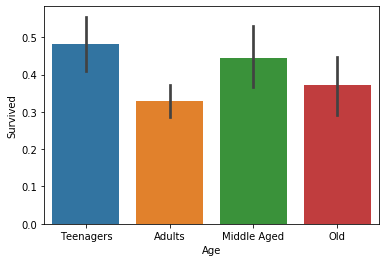

In [13]:
#draw a bar plot of Age vs. survival
sns.barplot(x="Age", y="Survived", data=td)
plt.show()

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


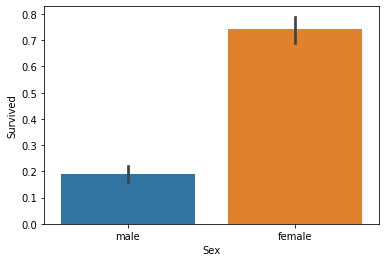

In [14]:

#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=td)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", td["Survived"][td["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", td["Survived"][td["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


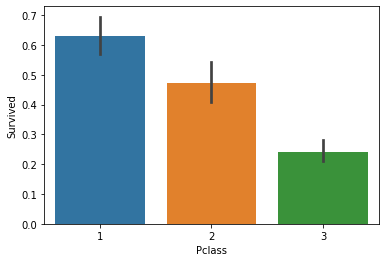

In [15]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=td)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", td["Survived"][td["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", td["Survived"][td["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", td["Survived"][td["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [16]:
td.dropna(inplace=True) # Now dropping all nulls

In [17]:
td.dtypes

Survived       int64
Pclass         int64
Sex           object
Age         category
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object

In [18]:
td["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

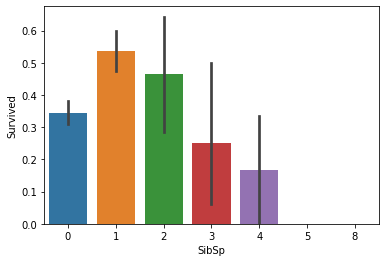

In [19]:
#draw a bar plot of SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=td)
plt.show()

In [20]:
td["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

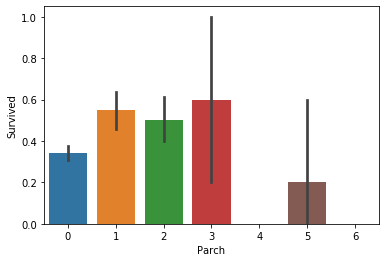

In [21]:
#draw a bar plot of Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=td)
plt.show()

In [22]:
td["Sex"]=pd.Categorical(td.Sex,["male","female"],ordered=False)

In [23]:
td.dtypes

Survived       int64
Pclass         int64
Sex         category
Age         category
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object

In [24]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Adults,1,0,7.2500,S
1,1,1,female,Middle Aged,1,0,71.2833,C
2,1,3,female,Adults,0,0,7.9250,S
3,1,1,female,Middle Aged,1,0,53.1000,S
4,0,3,male,Middle Aged,0,0,8.0500,S


In [25]:
#We have categorical variables .getdummies seperates the different categories of categorical variables as separate 
#binary columns
td1 = pd.get_dummies(td,drop_first=True)
#List of new columns
print(td1.columns)
td1.head(5)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Age_Adults', 'Age_Middle Aged', 'Age_Old', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Age_Adults,Age_Middle Aged,Age_Old,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0,0
2,1,3,0,0,7.9250,1,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,1,0,0,1
4,0,3,0,0,8.0500,0,0,1,0,0,1


In [26]:
td1["Fare"]=np.abs((td1["Fare"]-td1["Fare"].mean())/(td1["Fare"].std()))

In [27]:
td1.head(5)
td1.shape

(889, 11)

In [28]:
y=td1["Survived"].copy()
X=td1.drop(columns=["Survived"])
print(y.shape)
print(X.shape)

(889,)
(889, 10)


# Feature Engineering Using Random Forest Algorithm

In [29]:
#Random Forest method for feature selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
X_features=X.columns
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
imp_features= model.feature_importances_
feature_array=np.array(X_features)
sorted_features=pd.DataFrame(list(zip(feature_array,imp_features))).sort_values(by=1,ascending=False)
#print(sorted_features)
data_top=sorted_features[:X.shape[1]]
feature_to_rem=sorted_features[X.shape[1]:]
print("Unimportant Columms after simple Random Forrest\n",feature_to_rem)
rem_index=list(feature_to_rem.index)
print(rem_index)
print("Important Columms after simple Random Forrest\n",data_top)
data_top_index=list(data_top.index)
print("Important Columms after simple Random Forrest\n",data_top_index )
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
#cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
#print(cols_randfor_removed)
X_randfor_sel = X.drop(X.columns[rem_index],axis=1)
#X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

Unimportant Columms after simple Random Forrest
 Empty DataFrame
Columns: [0, 1]
Index: []
[]
Important Columms after simple Random Forrest
                  0         1
3             Fare  0.348636
4       Sex_female  0.311605
0           Pclass  0.109014
1            SibSp  0.057674
2            Parch  0.051679
7          Age_Old  0.029894
9       Embarked_S  0.029277
5       Age_Adults  0.029002
6  Age_Middle Aged  0.023293
8       Embarked_Q  0.009926
Important Columms after simple Random Forrest
 [3, 4, 0, 1, 2, 7, 9, 5, 6, 8]
[0.109  0.0577 0.0517 0.3486 0.3116 0.029  0.0233 0.0299 0.0099 0.0293]
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Age_Adults',
       'Age_Middle Aged', 'Age_Old', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Train Test Split

In [30]:
#creat train-test split parts for manual split

trainX, testX, trainy, testy= skm.train_test_split(X,y, test_size=0.25, random_state=99) #explain random state
print("\n shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n shape of train split: ")
print(testX.shape, testy.shape)


 shape of train split: 
(666, 10) (666,)

 shape of train split: 
(223, 10) (223,)


### Making X Scalar for ML algorithms

In [31]:
X = skp.StandardScaler().fit(X).transform(X)

# All Machine Learning Algorithms with Default Parameters

## K Nearest Neighbor Algorithm

In [32]:
knn = KNeighborsClassifier()
knn.fit(trainX,trainy)
predictions = knn.predict(testX)
accknn=accuracy_score(testy, predictions)*100
print("Accuracy of KNN (%): \n", accknn)  
#get FPR
fprknn, tprknn, _ = roc_curve(testy, predictions)
aucknn=auc(fprknn, tprknn)*100
print("AUC OF KNN (%): \n", aucknn)
recallknn=recall_score(testy,predictions)*100
print("Recall of KNN is: \n",recallknn)
precknn=precision_score(testy,predictions)*100
print("Precision of KNN is: \n",precknn)

Accuracy of KNN (%): 
 76.68161434977578
AUC OF KNN (%): 
 76.31996658312448
Recall of KNN is: 
 74.44444444444444
Precision of KNN is: 
 69.79166666666666


## Gaussian Naive Bayes Algorithm

In [33]:
gnb=GaussianNB()
gnb.fit(trainX,trainy)
predictions = gnb.predict(testX)
accgnb=accuracy_score(testy, predictions)*100
print("Accuracy of Gaussian Naive Bayes (%): \n",accgnb)  
#get FPR
fprgnb, tprgnb, _ = roc_curve(testy, predictions)
aucgnb=auc(fprgnb, tprgnb)*100
print("AUC OF Gaussian Naive Bayes (%): \n", aucgnb)
recallgnb=recall_score(testy,predictions)*100
print("Recall of Gaussian Naive Bayes is: \n",recallgnb)
precgnb=precision_score(testy,predictions)*100
print("Precision of Gaussian Naive Bayes is: \n",precgnb)

Accuracy of Gaussian Naive Bayes (%): 
 73.99103139013454
AUC OF Gaussian Naive Bayes (%): 
 73.16624895572264
Recall of Gaussian Naive Bayes is: 
 68.88888888888889
Precision of Gaussian Naive Bayes is: 
 67.3913043478261


## Logistic Regression Algorithm

In [34]:
lrg=LogisticRegression(solver='lbfgs')
lrg.fit(trainX,trainy)
predictions = lrg.predict(testX)
acclrg=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic regression (%): \n",acclrg)  
#get FPR
fprlrg, tprlrg, _ = roc_curve(testy, predictions)
auclrg=auc(fprlrg, tprlrg)*100
print("AUC OF Logistic regression (%): \n", auclrg)
recalllrg=recall_score(testy,predictions)*100
print("Recall of Logistic regression is: \n",recalllrg)
preclrg=precision_score(testy,predictions)*100
print("Precision of Logistic regression is: \n",preclrg)

Accuracy of Logistic regression (%): 
 74.88789237668162
AUC OF Logistic regression (%): 
 73.55889724310777
Recall of Logistic regression is: 
 66.66666666666666
Precision of Logistic regression is: 
 69.76744186046511


## Neural Networks Algorithm

In [35]:
nn=MLPClassifier(solver='lbfgs',hidden_layer_sizes=20,batch_size=150,max_iter=100, random_state=1)
nn.fit(trainX,trainy)
predictions = nn.predict(testX)
accnn=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks (%): \n",accnn)  
#get FPR
fprnn, tprnn, _ = roc_curve(testy, predictions)
aucnn=auc(fprnn, tprnn)*100
print("AUC OF Neural Networks (%): \n", aucnn)
recallnn=recall_score(testy,predictions)*100
print("Recall of Neural Networks is: \n",recallnn)
precnn=precision_score(testy,predictions)*100
print("Precision of Neural Networks is: \n",precnn)

Accuracy of Neural Networks (%): 
 77.13004484304933
AUC OF Neural Networks (%): 
 74.89974937343358
Recall of Neural Networks is: 
 63.33333333333333
Precision of Neural Networks is: 
 76.0


## Support Vector Machine Algorithm

In [36]:
svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(trainX,trainy)
predictions = svm.predict(testX)
accsvm=accuracy_score(testy, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)  
#get FPR
fprsvm, tprsvm, _ = roc_curve(testy, predictions)
aucsvm=auc(fprsvm, tprsvm)*100
print("AUC OF Support Vector Machine (%): \n", aucsvm)
recallsvm=recall_score(testy,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(testy,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 74.43946188340807
AUC OF Support Vector Machine (%): 
 72.82372598162071
Recall of Support Vector Machine is: 
 64.44444444444444
Precision of Support Vector Machine is: 
 69.87951807228916


## Decision Tree Algorithm

In [37]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(trainX,trainy)
predictions = dt.predict(testX)
accdt=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)  
#get FPR
fprdt, tprdt, _ = roc_curve(testy, predictions)
aucdt=auc(fprdt, tprdt)*100
print("AUC OF Decision Tree (%): \n",aucdt)
recalldt=recall_score(testy,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(testy,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 76.68161434977578
AUC OF Decision Tree (%): 
 75.78111946533
Recall of Decision Tree is: 
 71.11111111111111
Precision of Decision Tree is: 
 71.11111111111111


## Random forest Algorithm

In [38]:
rf=RandomForestClassifier()
rf.fit(trainX,trainy)
predictions = rf.predict(testX)
accrf=accuracy_score(testy, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)  
#get FPR
fprrf, tprrf, _ = roc_curve(testy, predictions)
aucrf=auc(fprrf, tprrf)*100
print("AUC OF Random Forest (%): \n", aucrf)
recallrf=recall_score(testy,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(testy,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 74.88789237668162
AUC OF Random Forest (%): 
 73.91812865497076
Recall of Random Forest is: 
 68.88888888888889
Precision of Random Forest is: 
 68.88888888888889


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Ada Boost Algorithm

In [39]:
ab=AdaBoostClassifier()
ab.fit(trainX,trainy)
predictions = ab.predict(testX)
accab=accuracy_score(testy, predictions)*100
print("Accuracy of AdaBoost (%): \n",accab)  
#get FPR
fprab, tprab, _ = roc_curve(testy, predictions)
aucab=auc(fprab, tprab)*100
print("AUC OF AdaBoost (%): \n",aucab)
recallab=recall_score(testy,predictions)*100
print("Recall of AdaBoost is: \n",recallab)
precab=precision_score(testy,predictions)*100
print("Precision of AdaBoost is: \n",precab)

Accuracy of AdaBoost (%): 
 75.33632286995515
AUC OF AdaBoost (%): 
 74.83291562238931
Recall of AdaBoost is: 
 72.22222222222221
Precision of AdaBoost is: 
 68.42105263157895


## Gradient Descent Boosting Algorithm

In [40]:
gb=GradientBoostingClassifier()
gb.fit(trainX,trainy)
predictions = gb.predict(testX)
accgb=accuracy_score(testy, predictions)*100
print("Accuracy of Gradient Descent Boosting (%): \n",accgb)  
#get FPR
fprgb, tprgb, _ = roc_curve(testy, predictions)
aucgb=auc(fprgb, tprgb)*100
print("AUC OF Gradient Descent Boosting (%): \n", aucgb)
recallgb=recall_score(testy,predictions)*100
print("Recall of Gradient Descent Boosting is: \n",recallgb)
precgb=precision_score(testy,predictions)*100
print("Precision of Gradient Descent Boosting is: \n",precgb)

Accuracy of Gradient Descent Boosting (%): 
 77.13004484304933
AUC OF Gradient Descent Boosting (%): 
 75.43859649122805
Recall of Gradient Descent Boosting is: 
 66.66666666666666
Precision of Gradient Descent Boosting is: 
 74.07407407407408


# Comparison of all the Machine Learning Algorithms by Comparing some Evaluation Metrics

In [41]:
algos=["K Nearest Neighbor","Guassian Naive Bayes","Logistic Regression","Neural Networks","Support Vector Machine","Decision Tree","Random Forrest","AdaBoost","Gradient Descent Boosting"]
acc=[accknn,accgnb,acclrg,accnn,accsvm,accdt,accrf,accab,accgb]
auc=[aucknn,aucgnb,auclrg,aucnn,aucsvm,aucdt,aucrf,aucab,aucgb]
recall=[recallknn,recallgnb,recalllrg,recallnn,recallsvm,recalldt,recallrf,recallab,recallgb]
prec=[precknn,precgnb,preclrg,precnn,precsvm,precdt,precrf,precab,precgb]
comp={"Algorithms":algos,"Accuracies":acc,"Area Under the Curve":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Area Under the Curve","Recall","Precision"], ascending=False))


,Algorithms,Accuracies,Area Under the Curve,Recall,Precision
8,Gradient Descent Boosting,77.130045,75.438596,66.666667,74.074074
3,Neural Networks,77.130045,74.899749,63.333333,76.000000
0,K Nearest Neighbor,76.681614,76.319967,74.444444,69.791667
5,Decision Tree,76.681614,75.781119,71.111111,71.111111
7,AdaBoost,75.336323,74.832916,72.222222,68.421053
6,Random Forrest,74.887892,73.918129,68.888889,68.888889
2,Logistic Regression,74.887892,73.558897,66.666667,69.767442
4,Support Vector Machine,74.439462,72.823726,64.444444,69.879518
1,Guassian Naive Bayes,73.991031,73.166249,68.888889,67.391304


# ROC of all the Machine Learning Algorithms on default parameters

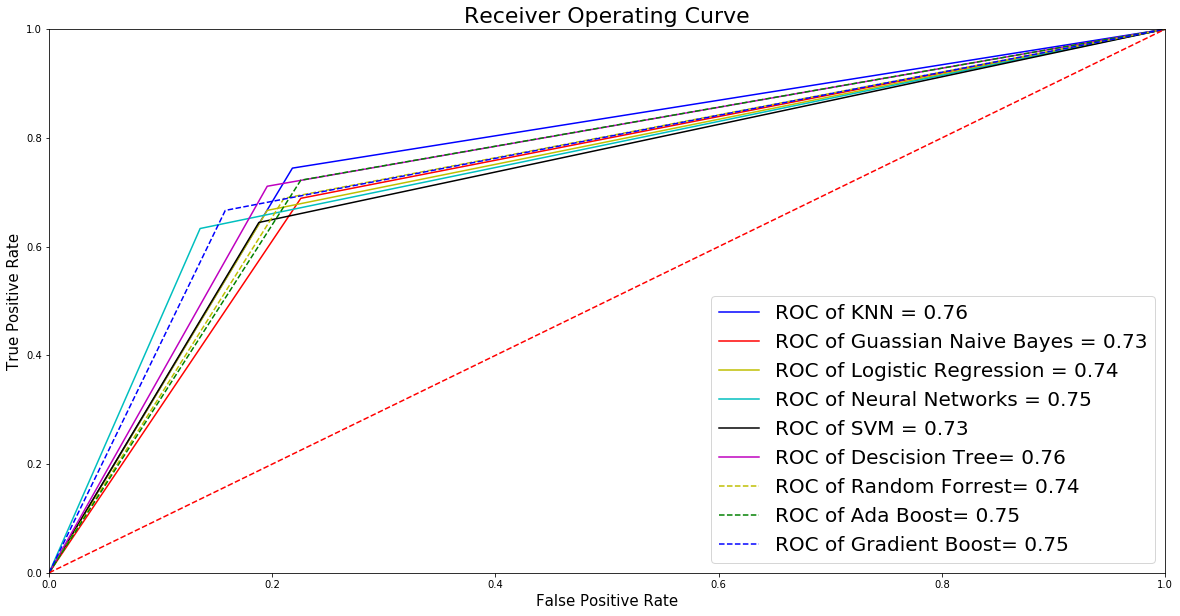

In [47]:
import sklearn.metrics as metrics
roc_auc1=metrics.auc(fprknn,tprknn)
roc_auc2=metrics.auc(fprgnb,tprgnb)
roc_auc3=metrics.auc(fprlrg,tprlrg)
roc_auc4=metrics.auc(fprnn,tprnn)
roc_auc5=metrics.auc(fprsvm,tprsvm)
roc_auc6=metrics.auc(fprdt,tprdt)
roc_auc7=metrics.auc(fprrf,tprrf)
roc_auc8=metrics.auc(fprab,tprab)
roc_auc9=metrics.auc(fprgb,tprgb)

# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknn,tprknn,"b",label="ROC of KNN = %0.2f" % roc_auc1)
plt.plot(fprgnb,tprgnb,"r",label="ROC of Guassian Naive Bayes = %0.2f" % roc_auc2)
plt.plot(fprlrg,tprlrg,"y",label="ROC of Logistic Regression = %0.2f" % roc_auc3)
plt.plot(fprnn,tprnn,"c",label="ROC of Neural Networks = %0.2f" % roc_auc4)
plt.plot(fprsvm,tprsvm,"k",label="ROC of SVM = %0.2f" % roc_auc5)
plt.plot(fprdt,tprdt,"m",label="ROC of Descision Tree= %0.2f" % roc_auc6)
plt.plot(fprrf,tprrf,"y--",label="ROC of Random Forrest= %0.2f" % roc_auc7)
plt.plot(fprab,tprab,"g--",label="ROC of Ada Boost= %0.2f" % roc_auc8)
plt.plot(fprgb,tprgb,"b--",label="ROC of Gradient Boost= %0.2f" % roc_auc9)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)

# Hyperparameter Tuning using Random Search on any 3 Algorithms

## Hyperparameter Tuning on K Nearest Neighbor using Random Search

In [48]:
from sklearn.model_selection import RandomizedSearchCV as rs
# K Nearest Neighbor with random search
parameters={"algorithm":['auto','ball_tree','kd_tree','brute'],"n_neighbors":range(1,10,1),"p":[1,2],"weights":["uniform","distance"]}
clf_knn=KNeighborsClassifier()
clfknnrs=rs(clf_knn,parameters,cv=5,scoring="precision")
clfknnrs.fit(trainX,trainy)
predictions = clfknnrs.predict(testX)
accknnrs=accuracy_score(testy, predictions)*100
print("Accuracy of KNN after Hyperparameter Tuning (%): \n",accknnrs)  
#get FPR
fprknnrs, tprknnrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recallknnrs=recall_score(testy,predictions)*100
print("Recall of KNN after Hyperparameter Tuning is: \n",recallknnrs)
precknnrs=precision_score(testy,predictions)*100
print("Precision of KNN after Hyperparameter Tuning is: \n",precknnrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfknnrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfknnrs.best_params_)

print("Best Estimators: \n",clfknnrs.best_estimator_)

Accuracy of KNN after Hyperparameter Tuning (%): 
 75.7847533632287
Recall of KNN after Hyperparameter Tuning is: 
 57.77777777777777
Precision of KNN after Hyperparameter Tuning is: 
 76.47058823529412
Best Score (%): 
 81.3177478954918
Best Parameters: 
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'algorithm': 'kd_tree'}
Best Estimators: 
 KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='uniform')


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Hyperparameter Tuning on Decision Tree using Random Search

In [49]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Decision Tree with random search
parameters={"min_samples_split":range(10,200,10),"max_depth":range(1,20,1)}
clf_treers=DecisionTreeClassifier()
clfrs=rs(clf_treers,parameters,cv=5,scoring="precision")
clfrs.fit(trainX,trainy)
predictions = clfrs.predict(testX)
accdtrs=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree after Hyperparameter Tuning (%): \n",accdtrs)  
#get FPR
fprdtrs, tprdtrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recalldtrs=recall_score(testy,predictions)*100
print("Recall of Decision Tree after Hyperparameter Tuning is: \n",recalldtrs)
precdtrs=precision_score(testy,predictions)*100
print("Precision of Decision Tree after Hyperparameter Tuning is: \n",precdtrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfrs.best_params_)

print("Best Estimators: \n",clfrs.best_estimator_)

Accuracy of Decision Tree after Hyperparameter Tuning (%): 
 76.23318385650224
Recall of Decision Tree after Hyperparameter Tuning is: 
 57.77777777777777
Precision of Decision Tree after Hyperparameter Tuning is: 
 77.61194029850746
Best Score (%): 
 81.23441747083051
Best Parameters: 
 {'min_samples_split': 70, 'max_depth': 6}
Best Estimators: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Hyperparameter Tuning on Neural Networks using Random Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Neural Networks with random search
parameters={"solver":['lbfgs','sgd','adam'],"hidden_layer_sizes":range(1,100,1),"batch_size":range(50,250,10),"max_iter":range(100,500,50),"learning_rate":['constant', 'invscaling', 'adaptive'],"activation":['identity', 'logistic', 'tanh', 'relu']}
clf_nn=MLPClassifier()
clfnnrs=rs(clf_nn,parameters,cv=5,scoring="precision")
clfnnrs.fit(trainX,trainy)
predictions = clfnnrs.predict(testX)
accnnrs=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks after Hyperparameter Tuning (%): \n",accnnrs)  
#get FPR
fprnnrs, tprnnrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recallnnrs=recall_score(testy,predictions)*100
print("Recall of Neural Networks after Hyperparameter Tuning is: \n",recallnnrs)
precnnrs=precision_score(testy,predictions)*100
print("Precision of Neural Networks after Hyperparameter Tuning is: \n",precnnrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfnnrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfnnrs.best_params_)

print("Best Estimators: \n",clfnnrs.best_estimator_)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\ne

Accuracy of Neural Networks after Hyperparameter Tuning (%): 
 74.88789237668162
Recall of Neural Networks after Hyperparameter Tuning is: 
 66.66666666666666
Precision of Neural Networks after Hyperparameter Tuning is: 
 69.76744186046511
Best Score (%): 
 81.09929259889287
Best Parameters: 
 {'solver': 'adam', 'max_iter': 150, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 25, 'batch_size': 80, 'activation': 'tanh'}
Best Estimators: 
 MLPClassifier(activation='tanh', alpha=0.0001, batch_size=80, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=25, learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ROC Graph after Hyperparameter Tuning using Random Search

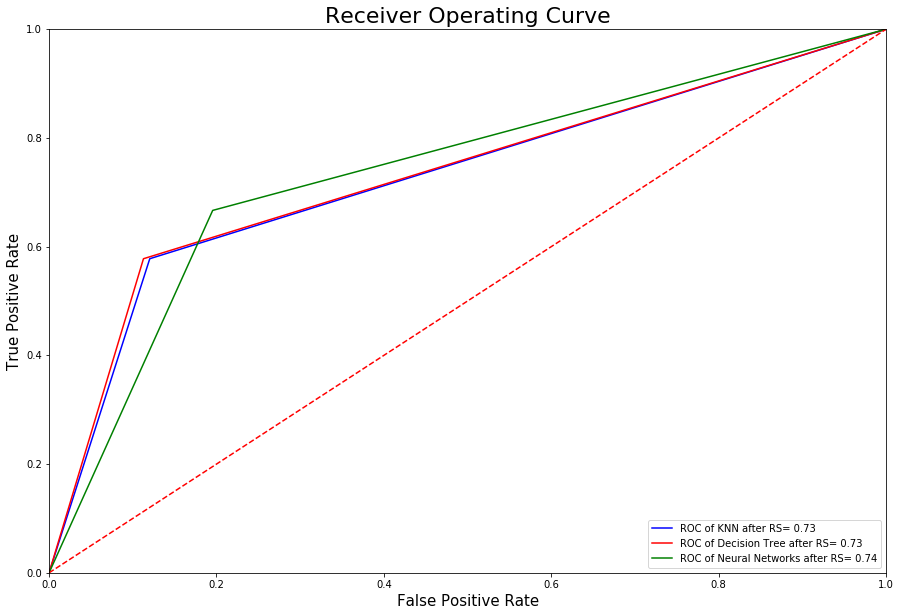

In [51]:
import sklearn.metrics as metrics
roc_auc1=metrics.auc(fprknnrs,tprknnrs)
roc_auc2=metrics.auc(fprdtrs,tprdtrs)
roc_auc3=metrics.auc(fprnnrs,tprnnrs)

# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknnrs,tprknnrs,"b",label="ROC of KNN after RS= %0.2f" % roc_auc1)
plt.plot(fprdtrs,tprdtrs,"r",label="ROC of Decision Tree after RS= %0.2f" % roc_auc2)
plt.plot(fprnnrs,tprnnrs,"g",label="ROC of Neural Networks after RS= %0.2f" % roc_auc3)

plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.rcParams.update({'font.size': 15})
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)

# Comparision of 3 algorithms before and after hyperparameter tuning

In [52]:
algos1=["K Nearest Neighbor","Neural Networks","Decision Tree"]
acc1=[accknn,accnn,accdt]
recall1=[recallknn,recallnn,recalldt]
prec1=[precknn,precnn,precdt]
comp1={"Algorithms":algos1,"Accuracies before RS":acc1,"Recall before RS":recall1,"Precision before RS":prec1}
compdf1=pd.DataFrame(comp1)
display(compdf1.sort_values(by=["Accuracies before RS","Recall before RS","Precision before RS"], ascending=False))
acc2=[accknnrs,accnnrs,accdtrs]
recall2=[recallknnrs,recallnnrs,recalldtrs]
prec2=[precknnrs,precnnrs,precdtrs]
comp2={"Algorithms":algos1,"Accuracies after RS":acc2,"Recall after RS":recall2,"Precision after RS":prec2}
compdf2=pd.DataFrame(comp2)
display(compdf2.sort_values(by=["Accuracies after RS","Recall after RS","Precision after RS"], ascending=False))

,Algorithms,Accuracies before RS,Recall before RS,Precision before RS
1,Neural Networks,77.130045,63.333333,76.000000
0,K Nearest Neighbor,76.681614,74.444444,69.791667
2,Decision Tree,76.681614,71.111111,71.111111


,Algorithms,Accuracies after RS,Recall after RS,Precision after RS
2,Decision Tree,76.233184,57.777778,77.611940
0,K Nearest Neighbor,75.784753,57.777778,76.470588
1,Neural Networks,74.887892,66.666667,69.767442
